<span style="font-size:10pt">AI @ ENSPIMA_2023-2024 / v1.1 september 2023 / Jean-Luc CHARLES (Jean-Luc.charles@mailo.com) / CC BY-SA 4.0 /</span>

# Machine learning with Python tensorflow2/keras modules:

# Train/operate a dense neural network for the recognition of handwritten digits

<br>
<div class="alert alert-block alert-danger">
<span style="color:brown;font-family:arial;font-size:12pt"> 
It is important to use a <span style="font-weight:bold;">Python Virtual Environment</span> (PVE) for your main Python projects: <br>
    a PVE makes it possible to control for each project the versions of the Python interpreter and the "sensitive" modules (like tensorflow).</span></div>

All the notebooks in this directory must be loaded into a `jupyter-notebook` or a `jupyter-lab` launched in the PVE <b><span style="color: rgb(200, 151, 102);" >pyml-pm</span></b> specially created for the session.<br>
They should be worked in this order:
- `ML1_MNIST_en.ipynb`: check that the <b><span style="color: rgb(200, 151, 102);">pyml-pm</span></b> EVP is fuly operationnal, load and use the data from the MNIST database (images and labels).
- `ML2_DNN_part1_en.ipynb`: build a Dense Neural Network (DNN), train it with data from the MNIST and evaluate its performance.
- `ML2_DNN_part2_en.ipynb`: reload a previously trained DNN and evaluate its performance with the MNIST test data.

## Targeted learning objectives:
- Know how to build a dense neural network with the Python modules **tensorflow** and **keras**.
- Know how to train a dense network with data from the MNIST bank.
- Know how to display the training performance curves.
- Know how to save the structure and the weights of the trained network.

## 1 - Verify importing Python modules
The **keras** module which allows high-level manipulation of **tensorflow** objects is integrated in the **tensorflow** (tf) module since version 2. <br>
The **tf.keras** module documentation to consult is here: https://www.tensorflow.org/api_docs/python/tf/keras.

Importing the `tensorflow` module in the cell below may generate some warning messages...<br>
if errors appear they must be corrected, possibly by recreating your PVE <b><span style="color: rgb(200, 51, 102);">pyml-pm</span></b>:

In [1]:
import os, sys, cv2

# Delete the (numerous) warning messages from the **tensorflow** module:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

print(f"Python    : {sys.version.split()[0]}")
print(f"tensorflow: {tf.__version__} incluant keras {keras.__version__}")
print(f"numpy     : {np.__version__}")
print(f"OpenCV    : {cv2.__version__}")

Python    : 3.8.18
tensorflow: 2.9.1 incluant keras 2.9.0
numpy     : 1.22.3
OpenCV    : 4.6.0


Embedding matplotlib plots in the notebook:

In [2]:
%matplotlib inline

# Dense network structure to build
In this step you will build a **dense network**, with:
- an **input layer** of 784 values in the range [0 ; 1.]<br>
(the pixels of the MNIST 28 $\times$ 28 images put in the form of a vector of 784 normalized `float` numbers),
- a **hidden layer** of 784 neurons using the `relu` activation function,
- an **output layer** with 10 neurons, for the classification of images into 10 classes associated with the digits {0,1,2...9}, using the `softmax` activation function adapted to classification problems .

<p style="text-align:center; font-style:italic; font-size:12px;">
    <img src="img/archiNetwork.png" alt="archiNetwork.png" style="width:900px;"><br>
    [image credit: JLC]
</p>

Remarks :
- Each neuron of the first hidden layer receives 785 inputs: the 784 values $x_i$ of the pixels of the image plus the bias.
- $\leadsto$ There are therefore 785 unknowns for each neuron: the 784 weights $w_i$ assigned to each input $x_i$, plus the weight $b$ assigned to input $-1$.
- $\leadsto$ there are therefore 785 $\times$ 784 unknowns for the hidden layer and 785 $\times$ 10 unknowns for the output layer: i.e. a total of 623290 unknowns whose value must be optimized by the algorithm d network learning.

## Work to do
### 1 - Load MNIST images and define important parameters
### 2 - Pre-process MNIST images and labels
### 3 - Build the dense neural network
### 4 - A first network training test
### 5 - Train the network and measure its performance at each *epoch*
### 6 - Train the network, measure its performance and manage the *over-fit*
### 7 - Save the trained network.<br>

### 1 - Load MNIST images and define important parameters

The work of loading MNIST images has been processed in the *notebook* `ML1_MNIST.ipynb`:

In [3]:
(im_train, lab_train), (im_test, lab_test) = tf.keras.datasets.mnist.load_data()
print("im_train -> shape:", im_train.shape, ", dtype:", im_train.dtype,)
print("im_test  -> shape:", im_test.shape,  ", dtype:", im_test.dtype,)
print("lab_train-> shape:", lab_train.shape,  ", dtype:", lab_train.dtype)
print("lab_test -> shape:", lab_test.shape,  ", dtype:", lab_test.dtype)

im_train -> shape: (60000, 28, 28) , dtype: uint8
im_test  -> shape: (10000, 28, 28) , dtype: uint8
lab_train-> shape: (60000,) , dtype: uint8
lab_test -> shape: (10000,) , dtype: uint8


#### Define important parameters

To avoid "hard writing" the **number of training and test images**, the **dimension** of the images and the **number of classes** to recognize, these parameters are retrieved from existing object attributes:
- the `shape` attribute of the `im_train` and `im_test` tables allows to extract the number of training and test images,
- the `size` attribute of the first training (or test) image gives the number of pixels of the images (784),<br>
- the transformation of the `lab_test` array into a Python `set` (a set) gives the set of labels to recognize, whose size is the number of classes.

complete the cell below accordingly:

In [4]:
nb_im_train = im_train.shape[0]    # number of traing images
nb_im_test  = im_test.shape[0]     # number of test images
nb_pixel    = im_train[0].size     # number of elements (pixels) of the firt training image
nb_classe   = len(set(lab_test))   # number of classes to recognize (the ten digits from 0 to 9)

Checking:

In [5]:
print(f"{nb_im_train} traing images and {nb_im_test} test images")
print(f"{nb_pixel} pixels in each image")
print(f"{nb_classe} classes to recognize (the digits from 0 to 9)")

60000 traing images and 10000 test images
784 pixels in each image
10 classes to recognize (the digits from 0 to 9)


## 2 - Pre-process MNIST images and labels

Two treatments must be applied to the data from the MNIST database:
- on the images: transform the matrices of  28$\,\times\,$28 pixels (`uint8`integers) into **normalized** vectors $(V_i)_{i=0..783}$ of 784 real values $V_i$ with $ 0 \leqslant V_i \leqslant 1$;
- on labels: transform scalar numbers into *one-hot* vectors.

### Transform input matrices into normalized vectors

Define the arrays `x_train` and `x_test` containing the matrices of the arrays `im_train` and `im_test` *flattened* as normalized vectors (values between 0 and 1).<br>
*tips*:
- use the `reshape` method of the *ndarray* class of *numpy* and the `nb_im_train`, `nb_im_test` and `nb_pixel` parameters previously defined,
- normalization can be handled by dividing arrays by their max value.

In [6]:
x_train = im_train.reshape(nb_im_train, nb_pixel)/im_train.max()
x_test  = im_test.reshape(nb_im_test, nb_pixel)/im_test.max()

Check the dimensions of the `x_train` and `x_test` arrays as well as their *min* and *max* values:

In [7]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

In [8]:
(x_train.min(), x_train.max()) == (0, 1)

True

In [9]:
(x_test.min(), x_test.max()) == (0, 1)

True

### *one-hot* encoding of labels:

Consult the documentation of the `to_categorical` function on the page [tf.keras.utils.to_categorical](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) and deduce how to define the `y_train` and `y_test` arrays containing the *hot-one* encoded version of the `lab_train` and `lab_test` arrays:

In [10]:
from tensorflow.keras.utils import to_categorical
# 'one-hot' encoding' des labels :
y_train = to_categorical(lab_train)
y_test  = to_categorical(lab_test)

Visually check the first 10 values of the `lab_train` and `y_train` arrays:

In [11]:
print(lab_train[:10])
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## 3 - Build the dense neural network

We will now build a dense **sequential** neural network in Python **5 lines** using the **keras** module.

Build the network incrementally in the cell below, following the proposed approach (see the page [guide/keras/sequential_model](https://www.tensorflow.org/guide/keras/sequential_model ) if necessary) :
- 1/ Create the object `model` instance of the class `Sequential` (cf [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)).
- 2/ With the `add` method of the `model` object add:
    - the input layer `Input(shape=<number of neurons>)` (cf [tf.keras.layers.Input](https://www.tensorflow.org/api_docs/python/tf/keras/Input) )<br>
    Use the `nb_pixel` parameter to specify the value of the `shape` parameter (which must be a `tuple`)...<br>
    - the intermediate dense layer (cf [tf.keras.layers.Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)): `Dense(<number of neurons>, activation='relu')` (cf [tf.keras.activation.relu](https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu))
    - the output dense layer: `Dense(<number of neurons>, activation='softmax')` (cf [tf.keras.activation.softmax](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax)).<br>
Use the `nb_pixel` and `nb_classe` parameters to indicate the number of neurons and the number of classes without 'writing them hard'...
- 3/ Once built, the network must be compiled (in the sense of tensorflow) with the `compile` method and the arguments:
    - `loss='categorical_crossentropy'`: choice of the error function (cf [tf.keras.categorical_crossentropy](https://www.tensorflow.org/api_docs/python/tf/keras/losses/categorical_crossentropy))
    - `optimizer='adam'`: choice of Adam optimizer (see page [tf.keras.optimizers.Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) )
    - `metrics=['accuracy']` to obtain training statistics to draw performance curves.

In [12]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# set the seed of the random generators used by tensorflow:
SEED = 1234
tf.random.set_seed(SEED)

# the 5 lines to build the neural network:
model = Sequential()
model.add(Input(shape=(nb_pixel,), name='Input'))
model.add(Dense(nb_pixel, activation='relu', name='C1'))
model.add(Dense(nb_classe, activation='softmax', name='C2'))
model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

*Note*: By using the `name` argument in the `Input` and `Dense` constructors, one can give custom names to the layers, which will appear in the `summary` and `plot_model` outputs.

With the `summary` method of the `model` object, display the description of the model and check the dimensions...

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 C1 (Dense)                  (None, 784)               615440    
                                                                 
 C2 (Dense)                  (None, 10)                7850      
                                                                 
Total params: 623,290
Trainable params: 623,290
Non-trainable params: 0
_________________________________________________________________


Why are there some `None` in the "Output Shape" column?

Find the total number of parameters with a simple formula...

In [14]:
785*784+785*10

623290

The `plot_model` function draws the structure of the network (see the page [tf.keras.utils.plot_model](https://www.tensorflow.org/api_docs/python/tf/keras/utils/plot_model)). <br>
Plot the model structure by adding the `show_shapes=True` option to the `plot_model` call:

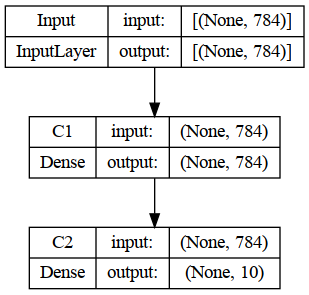

In [15]:
tf.keras.utils.plot_model(model, show_shapes=True)

### Save the initial DNN state

We can save the initial (random) values of the DNN weights with the `save_weights` method of the `Sequential` class. <br>
This will be useful later to reset the DNN to its initial state before starting other trainings:

In [16]:
import os

# Check whether the folder 'weights' exists and create it if needed:
if not os.path.isdir("weights"): os.mkdir("weights")

# Save the initial DNN (random) weights:
key = 'dense-1_init'
model.save_weights(os.path.join('weights', key))

# Display the created files:
files=[os.path.join("weights",f) for f in os.listdir("weights") if f.startswith(key)]
for f in files: print(f)

weights/dense-1_init.data-00000-of-00001
weights/dense-1_init.index


Note: the `save_weights` method uses the `key` part of its argument to prefix the created file names.<br>
When loading the NDD weights later with the `load_weights` method of the `Sequential` class, just use the same key to retrieve the relevant files.

Remarque : la méthode `save_weights` utilise la partie `key` du chemin passé en argument pour préfixer les fichiers créés.<br>
Lors de la lecture ultérieure des poids du réseau avec la méthode `load_weights` de la classe `Sequential`, il suffira de donner la même clef pour retrouver les bons fichiers.

## 4 - A first network training 

If necessary, consult the documentation of the `fit` method on the page [tf.keras.Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential).

Complete the cell below to train the DNN with the `fit` method of the `model` object using the arguments:
- `x_train`: the 60000 flattened and normalized images
- `y_train`: the 60000 *one-hot* encoded labels.
- `epochs=15`: repeat the training 15 times.
- `batch_size=128`: split the input data set (the 60000 images) into "batches" of size `batch_size` (here: batches of 128 images).<br>
Updating network weights is done after each batche of `batch_size` images.<br>
The value of `batch_size` (by default: 32) is a parameter that influences the quality of the training but also its memory footprint: you can later try different values (64, 128, 256 ...) and observe how the quality of the training evolves).

Name `hist` the data returned by the `fit` method.

In [17]:
# in case we execute this cell several times, we can re-initialize 
# the network to its initial state if we want to compare the workouts...
key = 'dense-1_init'
model.load_weights(os.path.join('weights', key)) 

# set the seed of the random generators inolved by tensorflow:
tf.random.set_seed(SEED)

# train the DNN:
hist = model.fit(x_train, y_train, epochs=15, batch_size=128)

Epoch 1/15
469/469 [==============================] - 6s 12ms/step - loss: 0.2479 - accuracy: 0.9292
Epoch 2/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0981 - accuracy: 0.9713
Epoch 3/15
469/469 [==============================] - 6s 13ms/step - loss: 0.0615 - accuracy: 0.9816
Epoch 4/15
469/469 [==============================] - 6s 12ms/step - loss: 0.0433 - accuracy: 0.9870
Epoch 5/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0308 - accuracy: 0.9914
Epoch 6/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0221 - accuracy: 0.9937
Epoch 7/15
469/469 [==============================] - 6s 12ms/step - loss: 0.0156 - accuracy: 0.9962
Epoch 8/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0112 - accuracy: 0.9972
Epoch 9/15
469/469 [==============================] - 6s 12ms/step - loss: 0.0087 - accuracy: 0.9980
Epoch 10/15
469/469 [==============================] - 6s 12ms/step - loss: 0.0079 - accura

Can you explain why there are 469 updates of the DNN weights per epoch ?

In [18]:
print(f" if we divide the datat set size:{len(x_train)} by the batch_szie:{128}, we get {len(x_train)/128}")

 if we divide the datat set size:60000 by the batch_szie:128, we get 468.75


The `hist` object returned by the `fit` method has a `history` attribute of type `dict` whose keys `'loss'` and `'accuracy'` are associated with the corresponding values at each _epoch_:

In [19]:
hist.history.keys()

dict_keys(['loss', 'accuracy'])

In [20]:
hist.history['loss']

[0.24794550240039825,
 0.098110131919384,
 0.06146115064620972,
 0.04326814040541649,
 0.03082914650440216,
 0.02207777462899685,
 0.01563672535121441,
 0.011206869967281818,
 0.008690484799444675,
 0.007855922915041447,
 0.007455987855792046,
 0.009264391846954823,
 0.006188449915498495,
 0.0031330601777881384,
 0.004463986027985811]

In [21]:
hist.history['accuracy']

[0.9292333126068115,
 0.9712666869163513,
 0.9815999865531921,
 0.9870333075523376,
 0.9913833141326904,
 0.9937333464622498,
 0.996150016784668,
 0.9972166419029236,
 0.9979833364486694,
 0.99795001745224,
 0.9980000257492065,
 0.9972833395004272,
 0.9983833432197571,
 0.9993000030517578,
 0.9987333416938782]

### Plot of the `loss` and `accuracy` curves

The `plot_loss_accuracy` function of the `utils.tools` module (found in the notebook directory) plots the "Model accuracy" and "Model loss" curves with the data stored in `hist`.<br> Import and use the `plot_loss_accuracy` function to plot these curves:

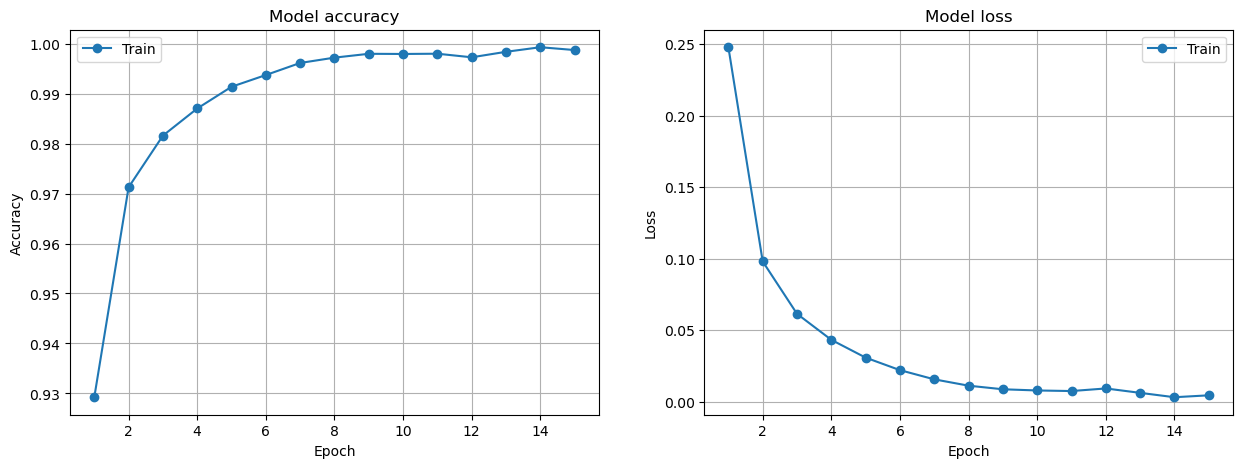

In [22]:
from utils.tools import plot_loss_accuracy
plot_loss_accuracy(hist)

## 5 - Train the network while measuring its performance at each *epoch*

To have a better indicator of the quality of the training, you can test at each `epoch` the precision of the inferences of the trained network using the test data: just pass the `validation_data` argument to the `fit` method, assigning it the test data tuple `(x_test, y_test)`:

In [23]:
# reload the initial state of the DNN
key = 'dense-1_init'
model.load_weights(os.path.join('weights', key))

# set the seed of the random generators inolved by tensorflow:
tf.random.set_seed(SEED)

hist = model.fit(x_train, y_train,
                 validation_data=(x_test, y_test), 
                 epochs=15, 
                 batch_size=128)

Epoch 1/15
469/469 [==============================] - 6s 13ms/step - loss: 0.1923 - accuracy: 0.9431 - val_loss: 0.0965 - val_accuracy: 0.9715
Epoch 2/15
469/469 [==============================] - 4s 9ms/step - loss: 0.0710 - accuracy: 0.9787 - val_loss: 0.0708 - val_accuracy: 0.9776
Epoch 3/15
469/469 [==============================] - 4s 9ms/step - loss: 0.0437 - accuracy: 0.9869 - val_loss: 0.0610 - val_accuracy: 0.9804
Epoch 4/15
469/469 [==============================] - 7s 15ms/step - loss: 0.0297 - accuracy: 0.9915 - val_loss: 0.0621 - val_accuracy: 0.9802
Epoch 5/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0194 - accuracy: 0.9947 - val_loss: 0.0589 - val_accuracy: 0.9813
Epoch 6/15
469/469 [==============================] - 6s 12ms/step - loss: 0.0138 - accuracy: 0.9965 - val_loss: 0.0541 - val_accuracy: 0.9823
Epoch 7/15
469/469 [==============================] - 8s 16ms/step - loss: 0.0097 - accuracy: 0.9977 - val_loss: 0.0563 - val_accuracy: 0.9836
E

Now the `hist.history` dictionary has also the new keys `val_loss` and `val_accuracy` calculated with the test data:

In [24]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Plot again the curves with the `plot_loss_accuracy` function:

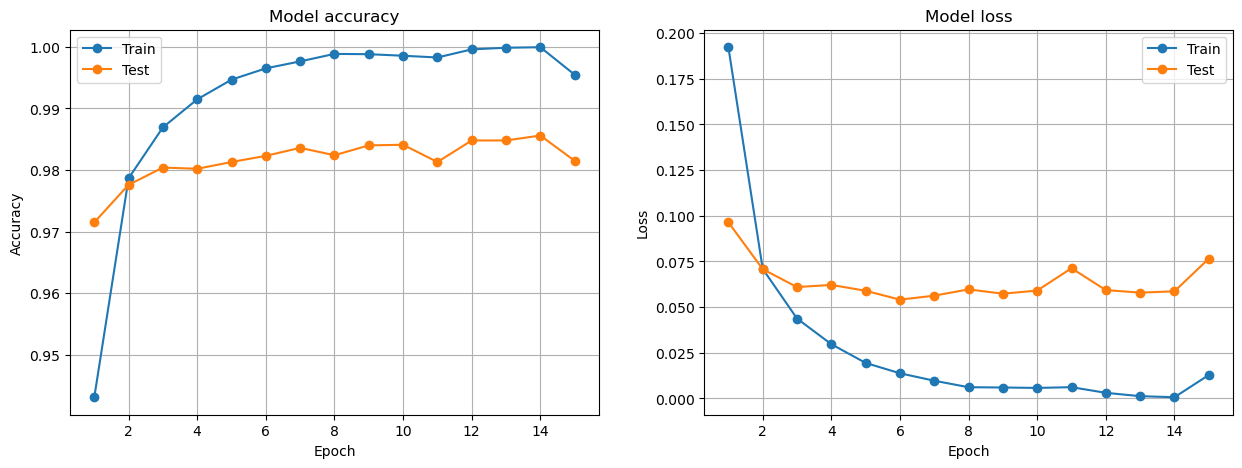

In [25]:
plot_loss_accuracy(hist)

the precision calculated with the test data tends towards a limit close to 98%. You might think that increasing the value of `epochs` would improve the precision of the network... but you run the risk of over-training the network (*over-fit*)...

## 6 - Train the network while measuring its performance at each *epoch* and managing the *over-fit*

The `Keras` module offers tools to automatically stop the training by monitoring, for example, the growth of precision from one `epoch` to another.
You define the parameters of the `EarlyStopping` (cf [EarlyStopping](https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping)) *callback* and pass it to the method `fit` via the `callbacks` argument:

Epoch 1/15
469/469 [==============================] - 6s 12ms/step - loss: 0.1941 - accuracy: 0.9430 - val_loss: 0.0950 - val_accuracy: 0.9711
Epoch 2/15
469/469 [==============================] - 5s 10ms/step - loss: 0.0705 - accuracy: 0.9786 - val_loss: 0.0719 - val_accuracy: 0.9783
Epoch 3/15
469/469 [==============================] - 5s 12ms/step - loss: 0.0429 - accuracy: 0.9874 - val_loss: 0.0622 - val_accuracy: 0.9792
Epoch 4/15
469/469 [==============================] - 4s 9ms/step - loss: 0.0294 - accuracy: 0.9913 - val_loss: 0.0592 - val_accuracy: 0.9819
Epoch 5/15
469/469 [==============================] - 4s 9ms/step - loss: 0.0200 - accuracy: 0.9944 - val_loss: 0.0554 - val_accuracy: 0.9824
Epoch 6/15
469/469 [==============================] - 6s 12ms/step - loss: 0.0142 - accuracy: 0.9963 - val_loss: 0.0548 - val_accuracy: 0.9834
Epoch 7/15
469/469 [==============================] - 7s 15ms/step - loss: 0.0101 - accuracy: 0.9975 - val_loss: 0.0575 - val_accuracy: 0.9833
E

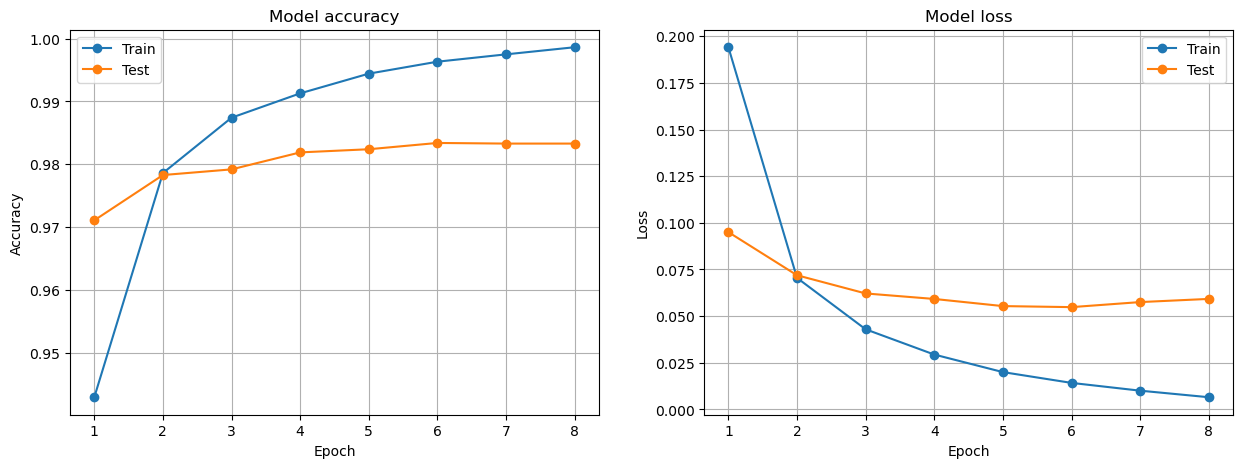

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

callbacks_list = [ 
    EarlyStopping(monitor='val_accuracy',  # the parameter to monitor
                  patience=2,              # accept that the parameter decreases only twice
                  restore_best_weights=True,
                  verbose=1)
]

# relod the DNN initial state:
key = 'dense-1_init'
model.load_weights(os.path.join('weights', key))

# set the seed of the random generators inolved by tensorflow:
tf.random.set_seed(SEED)

hist = model.fit(x_train, y_train,
                 validation_data=(x_test, y_test),
                 epochs=15, 
                 batch_size=128, 
                 callbacks = callbacks_list)

from utils.tools import plot_loss_accuracy
plot_loss_accuracy(hist)

Instead of monitoring the decrease of `val_accuracy` you can also monitor the increase of `val_loss`, which may be a prefeerd strategy (can you guess why ?):

Epoch 1/15
469/469 [==============================] - 7s 16ms/step - loss: 0.1948 - accuracy: 0.9426 - val_loss: 0.0957 - val_accuracy: 0.9708
Epoch 2/15
469/469 [==============================] - 6s 13ms/step - loss: 0.0712 - accuracy: 0.9786 - val_loss: 0.0725 - val_accuracy: 0.9777
Epoch 3/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0435 - accuracy: 0.9870 - val_loss: 0.0638 - val_accuracy: 0.9802
Epoch 4/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0302 - accuracy: 0.9909 - val_loss: 0.0609 - val_accuracy: 0.9807
Epoch 5/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0200 - accuracy: 0.9942 - val_loss: 0.0550 - val_accuracy: 0.9818
Epoch 6/15
469/469 [==============================] - 6s 13ms/step - loss: 0.0141 - accuracy: 0.9964 - val_loss: 0.0525 - val_accuracy: 0.9835
Epoch 7/15
469/469 [==============================] - 5s 11ms/step - loss: 0.0097 - accuracy: 0.9978 - val_loss: 0.0572 - val_accuracy: 0.9837

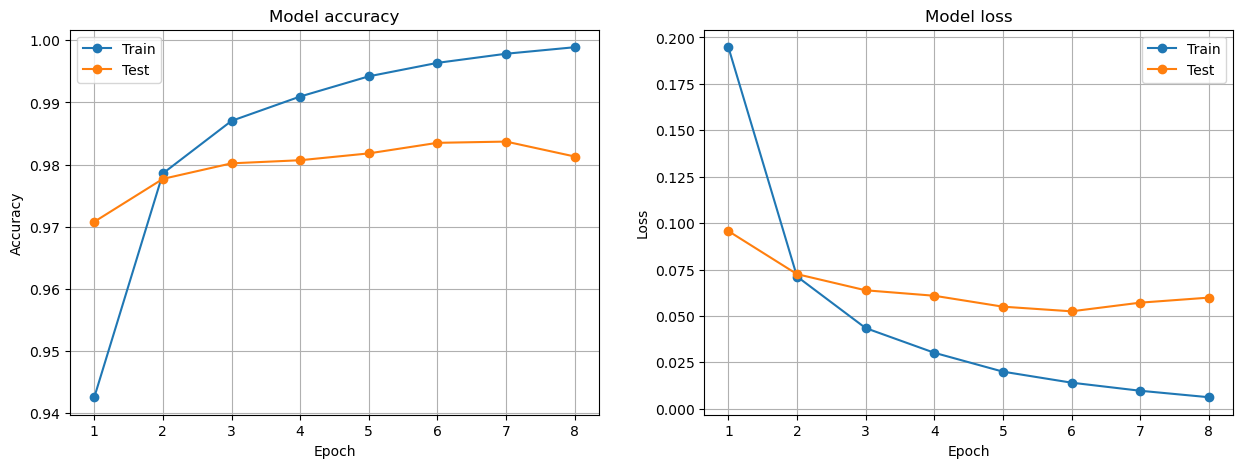

In [27]:
from tensorflow.keras.callbacks import EarlyStopping

callbacks_list = [ 
    EarlyStopping(monitor='val_loss',  # the parameter to monitor
                  patience=2,          # accept that 'val_loss' increases twice
                  restore_best_weights=True,
                  verbose=1)
]

# relod the DNN initial state:
key = 'dense-1_init'
model.load_weights(os.path.join('weights', key))

# set the seed of the random generators inolved by tensorflow:
tf.random.set_seed(SEED)

hist = model.fit(x_train, y_train,
                 validation_data=(x_test, y_test),
                 epochs=15, 
                 batch_size=128, 
                 callbacks = callbacks_list)

from utils.tools import plot_loss_accuracy
plot_loss_accuracy(hist)

## 8 - Save the trained DNN

The **weights** or **the structure and weights** of a trained network can be saved in a file with the `save_weights` and `save` methods of the `Sequential` class.<br>

### $\leadsto$ Save the weights of the trained DNN:

In [28]:
# Check whether the folder 'weights' exists and create it if needed:
if not os.path.exists("weights"): os.mkdir("weights")

# save the trained DNN weights:
key = 'trained-1_data'
model.save_weights(os.path.join('weights', key))

# Display the created files:
files=[os.path.join("weights",f) for f in os.listdir("weights") if f.startswith(key)]
for f in files: print(f)

weights/trained-1_data.index
weights/trained-1_data.data-00000-of-00001


### $\leadsto$ Save the weights AND structure of the trained DNN

The `save` method of the `Sequential` class saves **the structure** and the **weights** of the trained DNN.<br>
You can use later the `tf.keras.models.load_model` function to recreate the network and reload its trained weights to exploit it in operational situation.

In [29]:
# Check whether the folder 'models' exists and create it if needed:
if not os.path.exists("models"): os.mkdir("models")

# save the trained DNN structure + wieghts:
key = 'trained-1_model'
model.save(os.path.join('models', key) )

# Display the created files:
files=[os.path.join("models",f) for f in os.listdir("models") if f.startswith(key)]
for f in files: print(f)

INFO:tensorflow:Assets written to: models/trained-1_model/assets


INFO:tensorflow:Assets written to: models/trained-1_model/assets


models/trained-1_model


### Further work:
You can now load the `ML2_DNN_part2_en.ipynb` notebook to learn how to exploit the DNN you have just rained.

## Other interesting resources... videos:

In [30]:
%%HTML
<iframe src="https://www.youtube.com/embed/trWrEWfhTVg" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [31]:
%%HTML
<iframe src="https://www.youtube.com/embed/aircAruvnKk" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [32]:
%%HTML
<iframe src="https://www.youtube.com/embed/IHZwWFHWa-w" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>

In [33]:
%%HTML
<iframe src="https://www.youtube.com/embed/Ilg3gGewQ5U" width="800" height="450" frameborder="0" allow="accelerometer; autoplay; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>